<a href="https://colab.research.google.com/github/Shibu4064/EMNLP/blob/main/Copy_of_Copy_of_applying_transfer_learning_from_HS_to_contest_data_middle_non_frozen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Extracting base finetuned(with BD-SHS dataset) from the finetuned model(Did not run the code yet)<h1>

In [1]:
!pip install --quiet transformers
!pip install --quiet gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 62.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 62.9 MB/s eta 0:00:00


In [2]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification, AutoTokenizer, AutoModelForMaskedLM, AutoModelForSequenceClassification
import gdown

In [ ]:
# #defining some hyperparameters
# max_number_input_tokens=256
# batch_size_training = 16
# first_dropout_rate = 0.3
# hidden_output = 768
# bert_model_name = "sagorsarker/bangla-bert-base"
# adam_opt_lr = 3e-5
# scheduler_step = 1
# scheduler_gamma = 0.8
# epochs = 10
# classes = 2
# need_split_dataset=False

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')
# DirPath = ('/content/drive/My Drive/Test/')
# Finetuned_model_path = DirPath+bert_model_name+"_CustomBertBengaliFullDataset6epoch885044valacc.pth"
# CollectedDatasetFileName = "Final_data.csv"
# CollectedDatasetPath = DirPath+"EMNLP/"+CollectedDatasetFileName
# SplittedTrainFileName = "train.csv"
# SplittedValFileName = "dev.csv"
# SplittedTrainDataPath = DirPath+"EMNLP/"+SplittedTrainFileName
# SplittedValDataPath = DirPath+"EMNLP/"+SplittedValFileName

In [ ]:
# def interchange(df_train,pos,label):
#   #setting the first sample to be with label '0'
#   zero_index = df_train[df_train['label'] == label].index[0]
#   first_index=pos
#   # interchange the samples
#   df_train.iloc[[first_index, zero_index]] = df_train.iloc[[zero_index, first_index]]
#   return df_train

In [ ]:
# def balanceclasses(df_train):
#   class_counts = df_train['label'].value_counts()
#   min_count = class_counts.max()

#   # Create new DataFrames for each class with fewer samples
#   new_dfs = []
#   for label, count in class_counts.items():
#     if count == min_count:
#         continue
#     df_label = df_train[df_train['label'] == label]
#     num_copies = min_count // count
#     new_df_label = pd.concat([df_label] * num_copies, ignore_index=True)
#     new_df_label = new_df_label.head(min_count-count)
#     #print(new_df_label.head(10))
#     new_dfs.append(new_df_label)

#   # Concatenate the new DataFrames with the original DataFrame
#   df_balanced = pd.concat([df_train] + new_dfs, ignore_index=True).sample(frac=1).reset_index(drop=True)
#   return df_balanced

In [ ]:
# from sklearn.model_selection import train_test_split

# #splitting the dataset and saving
# if need_split_dataset==True:
#   #dataset loading
#   df = pd.read_csv(CollectedDatasetPath)[ ['Text','label'] ]
#   print(f'df label counts\n',df['label'].value_counts())
#   # check if there is any NaN value in the dataframe
#   print(f'null values: {df.isna().sum()}')

#   #null indices
#   null_index = df.index[df.isna().any(axis=1)]
#   print(f'null indices: {null_index}')

#   #dropping null values
#   df = df.dropna()

#   df_train, df_val = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=42)
#   df_train.to_csv(SplittedTrainDataPath)
#   df_val.to_csv(SplittedValDataPath)
# else:
#   df_train = pd.read_csv(SplittedTrainDataPath)[ ['text','label'] ]
#   df_val = pd.read_csv(SplittedValDataPath)[ ['text','label'] ]

# # count the number of each unique label in train and validation dataframes
# train_label_counts = df_train['label'].value_counts()
# val_label_counts = df_val['label'].value_counts()

# #setting the first sample to be with label '0'
# zero_index = df_train[df_train['label'] == 0].index[0]
# first_index=0
# # interchange the samples
# df_train.iloc[[first_index, zero_index]] = df_train.iloc[[zero_index, first_index]]

# print(df_train.shape)
# print(df_val.shape)
# print('Train label counts:\n', train_label_counts)
# print('Validation label counts:\n', val_label_counts)

# print("\n after making copies:")
# #balance all classes making copies
# df_train = balanceclasses(df_train)
# print(df_train['label'].value_counts())

# #setting the first sample to be with label '0'
# zero_index = df_train[df_train['label'] == 0].index[0]
# first_index=0
# # interchange the samples
# df_train.iloc[[first_index, zero_index]] = df_train.iloc[[zero_index, first_index]]

# #setting the first sample to be with label '0'
# zero_index = df_train[df_train['label'] == 1].index[0]
# first_index=1
# # interchange the samples
# df_train.iloc[[first_index, zero_index]] = df_train.iloc[[zero_index, first_index]]

# print(df_train)
# print(df_val)

In [3]:
train_dataset_link = "https://drive.google.com/uc?id=1uCHk3x81Jfw3iL-WlKtnK0dC-j7pxbyL"
val_dataset_link = "https://drive.google.com/uc?id=1yWabvxdMa6GWaE_K6cVNI0TylCP3MYHg"
model_link = "https://drive.google.com/uc?id=1-B-8OcoFPb0VwDSenuqUTHvAAIzpP5h-"
DirPath = './'

gdown.download(train_dataset_link,"train.csv")
gdown.download(val_dataset_link,"val.csv")
gdown.download(model_link,"fine_tuned_model.pth")
df_train = pd.read_csv("train.csv")[ ['text','label'] ]
df_val = pd.read_csv("val.csv")[ ['text','label'] ]
print(df_train.shape)
print(df_val.shape)

Downloading...
From: https://drive.google.com/uc?id=1uCHk3x81Jfw3iL-WlKtnK0dC-j7pxbyL
To: /content/train.csv
100%|██████████| 725k/725k [00:00<00:00, 63.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yWabvxdMa6GWaE_K6cVNI0TylCP3MYHg
To: /content/val.csv
100%|██████████| 345k/345k [00:00<00:00, 86.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-B-8OcoFPb0VwDSenuqUTHvAAIzpP5h-
To: /content/fine_tuned_model.pth
100%|██████████| 658M/658M [00:03<00:00, 186MB/s]

(2700, 2)
(1330, 2)


In [4]:
tokenizer = AutoTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
bangla_bert = AutoModelForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base",output_hidden_states=True)

bangla_bert.load_state_dict(torch.load("/content/fine_tuned_model.pth"),strict=False)
bangla_bert

Some weights of the model checkpoint at sagorsarker/bangla-bert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'bert.pooler.dense.weight', 'bert.pooler.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertForMaskedLM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_

In [5]:
classifier_model = AutoModelForSequenceClassification.from_pretrained("sagorsarker/bangla-bert-base")
classifier_model.bert.embeddings = bangla_bert.bert.embeddings
classifier_model.bert.encoder = bangla_bert.bert.encoder
classifier_model.classifier.out_features=3
classifier_model
model = classifier_model

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at sagorsarker/bangla-bert-base and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# class NewsDatasets(Dataset):
#     def __init__(self, data, max_length=max_number_input_tokens):
#         self.data = data

#         self.config = {
#             "max_length": max_length,
#             "padding": "max_length",
#             "return_tensors": "pt",
#             "truncation": True,
#             "add_special_tokens": True,
#             "truncation_strategy":"longest_first"
#         }

#     def __len__(self):
#         return len(self.data)

#     def __getitem__(self, idx):
#         value = self.data.iloc[idx]
#         return value['text'] , value['label']

In [ ]:
# training_data = NewsDatasets(df_train)
# train_dataloader = DataLoader(training_data, batch_size=batch_size_training, shuffle=True)

# val_data = NewsDatasets(df_val)
# val_dataloader = DataLoader(val_data, batch_size=batch_size_training, shuffle=True)

# test_data = NewsDatasets(df_val)
# test_dataloader = DataLoader(test_data, batch_size=batch_size_training, shuffle=True)

In [ ]:
# class HateSpeechBert(nn.Module):

#     def __init__(self, bert):
#         super(HateSpeechBert, self).__init__()

#         self.bert = bert

#         # dropout layer
#         self.dropout = nn.Dropout(first_dropout_rate)

#         # relu activation function
#         self.relu = nn.ReLU()
#         self.tanh = nn.Tanh()

#         # dense layer 1
#         self.fc1 = nn.Linear(hidden_output*2, hidden_output)

#         #dense layer 2
#         self.fc2 = nn.Linear(hidden_output, 128)

#         # dense layer 2 (Output layer)
#         self.fc3 = nn.Linear(128, 2)

#         #softmax
#         self.softmax = nn.Softmax(dim=1)

#     # define the forward pass
#     def forward(self, input_ids, token_type_ids, attention_mask):
#         # pass the inputs to the model
#         out = self.bert(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

#         mean, _ = torch.max(out[0], 1)
#         x= torch.cat((mean,out[1]), dim=1)

#         x = self.dropout(x)

#         x = self.fc1(x)
#         x = self.relu(x)

#         x = self.fc2(x)
#         x = self.relu(x)

#         # output layer
#         x = self.fc3(x)
#         x = self.softmax(x)

#         return x

In [6]:
class BERTBengali(nn.Module):
    def __init__(self, bert):
        super(BERTBengali, self).__init__()
        #self.bert = BertForMaskedLM.from_pretrained("sagorsarker/bangla-bert-base")
        self.bert = bert
        self.bert_drop = nn.Dropout(0.2)
        self.out = nn.Linear(hidden_output, 2)

    def forward(self, input_ids, attention_mask, token_type_ids):
        output = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        bo = self.bert_drop(output[1])

        output = self.out(bo)
        return output

In [ ]:
# class BERTBengaliPooler(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliPooler, self).__init__()
#         self.bert = bert
#         #self.bert.pooler.dense = nn.Linear(bert.config.hidden_size, bert.config.hidden_size)
#         self.bert_drop = nn.Dropout(first_dropout_rate)
#         self.out = nn.Linear(bert.config.hidden_size, classes)
#         #softmax
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         pooled_output = outputs.pooler_output
#         bo = self.bert_drop(pooled_output)

#         output = self.out(bo)
#         output = self.softmax(bo)
#         return output

In [ ]:
# class CustomBERTBengali(nn.Module):
#     def __init__(self, bert):
#         super(CustomBERTBengali, self).__init__()
#         self.bert = bert
#         self.bert_drop = nn.Dropout(first_dropout_rate)
#         self.tanh = nn.Tanh()
#         self.out = nn.Linear(hidden_output * 3, classes)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         o1 = outputs.hidden_states[-1]
#         o2 = outputs.pooler_output
#         apool = torch.mean(o1, 1)
#         mpool, _ = torch.max(o1, 1)
#         pooled_output = o2
#         cat = torch.cat((apool, mpool, pooled_output), 1)
#         bo = self.bert_drop(cat)
#         logits = self.out(bo)
#         logits = self.softmax(logits)
#         return logits

In [ ]:
# class BERTBengaliTwo(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliTwo, self).__init__()
#         self.bert = bert
#         self.drop_out = nn.Dropout(first_dropout_rate)
#         self.l0 =  nn.Linear(hidden_output * 2, classes)
#         torch.nn.init.normal_(self.l0.weight, std=0.02)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         out = torch.cat((outputs.hidden_states[-1], outputs.hidden_states[-2]), dim=-1)
#         out = self.drop_out(out)
#         out = out[:,0,:]
#         logits = self.l0(out)
#         logits = self.softmax(logits)
#         return logits

In [ ]:
# class BERTBengaliLastTwoPooler(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliLastTwoPooler, self).__init__()
#         self.bert = bert
#         self.drop_out = nn.Dropout(first_dropout_rate)
#         self.l0 =  nn.Linear(hidden_output * 3, classes)
#         #torch.nn.init.normal_(self.l0.weight, std=0.02)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         mpool, _ = torch.max(outputs.hidden_states[-1], 1)
#         out = torch.cat((mpool, outputs.hidden_states[-2][:,0,:],outputs.pooler_output), dim=-1)
#         out = self.drop_out(out)
#         #out = out[:,0,:]
#         logits = self.l0(out)
#         logits = self.softmax(logits)
#         return logits

In [ ]:
# bert = BertModel.from_pretrained(bert_model_name, output_hidden_states=True)
# tokenizer = BertTokenizer.from_pretrained(bert_model_name)

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# #creating the structure to contain finetuned bert
# struct_model = CustomBERTBengali(bert)
# struct_model.to(device)

# #loading the finetuned model which have leaned necessary info from other domain
# struct_model.load_state_dict(torch.load(Finetuned_model_path))

# # Access the bert model
# finetuned_bert_base = struct_model.bert

<h1>Creating a model with transferred learned knowledge capable of being finetuned with collected data and training it
##Note: test data and val data are same here.<h1>

In [7]:
###Hyperparameter for the new model
#defining some hyperparameters
max_number_input_tokens=256
batch_size_training = 8
first_dropout_rate = 0.0
hidden_output = 768
bert_model_name = "sagorsarker/bangla-bert-base"
adam_opt_lr = 3e-5
scheduler_step = 1
scheduler_gamma = 0.98
epochs = 100
classes = 3
#need_split_dataset=False

In [8]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=max_number_input_tokens):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True,
            "truncation_strategy":"longest_first"
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['text'] , value['label']

In [9]:
training_data = NewsDatasets(df_train)
train_dataloader = DataLoader(training_data, batch_size=batch_size_training, shuffle=True)

val_data = NewsDatasets(df_val)
val_dataloader = DataLoader(val_data, batch_size=batch_size_training, shuffle=True)

test_data = NewsDatasets(df_val)
test_dataloader = DataLoader(test_data, batch_size=batch_size_training, shuffle=True)

In [10]:
class BERTBengaliTwo(nn.Module):
    def __init__(self, bert):
        super(BERTBengaliTwo, self).__init__()
        self.bert = bert
        self.drop_out = nn.Dropout(first_dropout_rate)
        self.l0 =  nn.Linear(hidden_output * 2, classes)
        torch.nn.init.normal_(self.l0.weight, std=0.02)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        out = torch.cat((outputs.hidden_states[-1], outputs.hidden_states[-2]), dim=-1)
        out = self.drop_out(out)
        out = out[:,0,:]
        logits = self.l0(out)
        return logits

In [ ]:
# #model for finetuning collected data
# class BERTBengaliLastTwoPooler(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliLastTwoPooler, self).__init__()
#         self.bert = bert
#         self.drop_out = nn.Dropout(first_dropout_rate)
#         self.l0 =  nn.Linear(hidden_output * 3, classes)
#         #torch.nn.init.normal_(self.l0.weight, std=0.02)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         mpool, _ = torch.max(outputs.hidden_states[-1], 1)
#         out = torch.cat((mpool, outputs.hidden_states[-2][:,0,:],outputs.pooler_output), dim=-1)
#         out = self.drop_out(out)
#         #out = out[:,0,:]
#         logits = self.l0(out)
#         logits = self.softmax(logits)
#         return logits

In [ ]:
# class CustomBERTBengali(nn.Module):
#     def __init__(self, bert):
#         super(CustomBERTBengali, self).__init__()
#         self.bert = bert
#         self.bert_drop = nn.Dropout(first_dropout_rate)
#         self.tanh = nn.Tanh()
#         self.out = nn.Linear(hidden_output * 3, classes)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask, token_type_ids):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         o1 = outputs.hidden_states[-1]
#         o2 = outputs.pooler_output
#         apool = torch.mean(o1, 1)
#         mpool, _ = torch.max(o1, 1)
#         pooled_output = o2
#         cat = torch.cat((apool, mpool, pooled_output), 1)
#         bo = self.bert_drop(cat)
#         logits = self.out(bo)
#         #logits = self.softmax(logits)
#         return logits

In [ ]:
# #model for finetuning collected data
# class BERTBengaliLastTwoPoolerFreeze(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliLastTwoPoolerFreeze, self).__init__()
#         self.bert = bert
#         self.drop_out = nn.Dropout(first_dropout_rate)
#         self.l2 = nn.Linear(hidden_output * 3, hidden_output * 2)
#         self.activation = nn.Tanh()
#         self.l1 = nn.Linear(hidden_output * 2, hidden_output * 2)
#         self.activation = nn.Tanh()
#         self.l0 = nn.Linear(hidden_output * 2, classes)
#         #torch.nn.init.normal_(self.l0.weight, std=0.02)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask=None, token_type_ids=None):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         mpool, _ = torch.max(outputs.hidden_states[-1], 1)
#         out = torch.cat((outputs.hidden_states[-2][:,0,:], mpool,outputs.pooler_output), dim=-1)
#         out = self.drop_out(out)
#         out = self.l2(out)
#         out = self.activation(out)
#         out = self.l1(out)
#         out = self.activation(out)
#         logits = self.l0(out)
#         #prob = self.softmax(logits)
#         return logits


In [ ]:
# #model for finetuning collected data
# class BERTBengaliLastTwoPoolerFreezePrev(nn.Module):
#     def __init__(self, bert):
#         super(BERTBengaliLastTwoPoolerFreezePrev, self).__init__()
#         self.bert = bert
#         self.drop_out = nn.Dropout(first_dropout_rate)
#         self.l1 = nn.Linear(hidden_output * 3, hidden_output * 2)
#         self.activation = nn.Tanh()
#         self.l0 = nn.Linear(hidden_output * 2, classes)
#         #torch.nn.init.normal_(self.l0.weight, std=0.02)
#         self.softmax = nn.Softmax(dim=1)

#     def forward(self, input_ids, attention_mask=None, token_type_ids=None):
#         outputs = self.bert(
#             input_ids,
#             attention_mask=attention_mask,
#             token_type_ids=token_type_ids
#         )
#         mpool, _ = torch.max(outputs.hidden_states[-1], 1)
#         out = torch.cat((outputs.hidden_states[-2][:,0,:], mpool,outputs.pooler_output), dim=-1)
#         out = self.drop_out(out)
#         out = self.l1(out)
#         out = self.activation(out)
#         logits = self.l0(out)
#         #prob = self.softmax(logits)
#         return logits


In [11]:
model = BERTBengaliTwo(bangla_bert)
# model2Forlastlayers = BERTBengaliLastTwoPoolerFreezePrev(finetuned_bert_base)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
# model2Forlastlayers.to(device)
# model2Forlastlayers.load_state_dict(torch.load(DirPath+bert_model_name+"_lasttwopoolerf_contest_val_from_acc1_frozen_acc1.pth"))

# model.l0 = model2Forlastlayers.l0
# model.l2 = model2Forlastlayers.l1
# model.bert = struct_model.bert

# model.load_state_dict(torch.load(DirPath+bert_model_name+"_lasttwopoolerf_contest_val_from_finalhs_frozen_acc1_step2.pth"))

# for params in model.bert.parameters():
#   params.requires_grad = False
# for params in model.bert.encoder.parameters():
#   params.requires_grad = True
# for params in model.l2.parameters():
#   params.requires_grad = False
# for params in model.l1.parameters():
#   params.requires_grad = False
# for params in model.l0.parameters():
#   params.requires_grad = False

for name, param in model.named_parameters():
  if param.requires_grad:
      print(f"name: {name} is trainable")
  else:
      print(f"name: {name} is non-trainable")

name: bert.bert.embeddings.word_embeddings.weight is trainable
name: bert.bert.embeddings.position_embeddings.weight is trainable
name: bert.bert.embeddings.token_type_embeddings.weight is trainable
name: bert.bert.embeddings.LayerNorm.weight is trainable
name: bert.bert.embeddings.LayerNorm.bias is trainable
name: bert.bert.encoder.layer.0.attention.self.query.weight is trainable
name: bert.bert.encoder.layer.0.attention.self.query.bias is trainable
name: bert.bert.encoder.layer.0.attention.self.key.weight is trainable
name: bert.bert.encoder.layer.0.attention.self.key.bias is trainable
name: bert.bert.encoder.layer.0.attention.self.value.weight is trainable
name: bert.bert.encoder.layer.0.attention.self.value.bias is trainable
name: bert.bert.encoder.layer.0.attention.output.dense.weight is trainable
name: bert.bert.encoder.layer.0.attention.output.dense.bias is trainable
name: bert.bert.encoder.layer.0.attention.output.LayerNorm.weight is trainable
name: bert.bert.encoder.layer.0.at

In [12]:
#testing if the input of model works before starting training
s = "আমি বাংলায় গান গাই। [SEP]"
t = tokenizer.encode_plus(s, return_tensors="pt").to(device)
print(t)
out = model(**t)
print(out)

{'input_ids': tensor([[  101,  2169,  2492,  9294,  2552, 13985,  1014,   102,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
tensor([[ 0.1571,  0.1101, -0.3374]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [13]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(filter(lambda p: p.requires_grad, model.parameters()), lr=adam_opt_lr)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=scheduler_step, gamma=scheduler_gamma)

In [14]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        #labels = labels.to(device)
        labels = labels.to(device, dtype=torch.long)  # Convert labels to torch.long

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        #print("successfully calculated criterion in train!")
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [15]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0
    label_0_TP = 0
    label_0_TN = 0
    label_0_FP = 0
    label_0_FN = 0

    label_1_TP = 0
    label_1_TN = 0
    label_1_FP = 0
    label_1_FN = 0

    label_2_TP = 0
    label_2_TN = 0
    label_2_FP = 0
    label_2_FN = 0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device, dtype=torch.long)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        #print(f'predicted: {predicted} labels: {labels}')
        label_0_TP += ((predicted == 0) & (labels == 0)).sum().item()
        label_0_TN += ((predicted != 0) & (labels != 0)).sum().item()
        label_0_FP += ((predicted == 0) & (labels != 0)).sum().item()
        label_0_FN += ((predicted != 0) & (labels == 0)).sum().item()

        label_1_TP += ((predicted == 1) & (labels == 1)).sum().item()
        label_1_TN += ((predicted != 1) & (labels != 1)).sum().item()
        label_1_FP += ((predicted == 1) & (labels != 1)).sum().item()
        label_1_FN += ((predicted != 1) & (labels == 1)).sum().item()

        label_2_TP += ((predicted == 2) & (labels == 2)).sum().item()
        label_2_TN += ((predicted != 2) & (labels != 2)).sum().item()
        label_2_FP += ((predicted == 2) & (labels != 2)).sum().item()
        label_2_FN += ((predicted != 2) & (labels == 2)).sum().item()

    return total, correct, valid_loss, label_0_TP, label_0_TN, label_0_FP, label_0_FN, label_1_TP, label_1_TN, label_1_FP, label_1_FN, label_2_TP, label_2_TN, label_2_FP, label_2_FN


In [16]:

tokenizer_config = {
    "max_length": max_number_input_tokens,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True,
     "truncation_strategy":"longest_first"
}

In [20]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf
best_acc=0
sml = 1e-10
best_f1=0.4390

for epoch in range(epochs):


    if epoch==1:
      training_data = NewsDatasets(df_train)
      train_dataloader = DataLoader(training_data, batch_size=batch_size_training, shuffle=True)
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    label_0_TP = 0
    label_0_TN = 0
    label_0_FP = 0
    label_0_FN = 0

    label_1_TP = 0
    label_1_TN = 0
    label_1_FP = 0
    label_1_FN = 0

    label_2_TP = 0
    label_2_TN = 0
    label_2_FP = 0
    label_2_FN = 0


    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, val_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]
    label_0_TP += out[3]
    label_0_TN += out[4]
    label_0_FP += out[5]
    label_0_FN += out[6]

    label_1_TP += out[7]
    label_1_TN += out[8]
    label_1_FP += out[9]
    label_1_FN += out[10]

    label_2_TP += out[11]
    label_2_TN += out[12]
    label_2_FP += out[13]
    label_2_FN += out[14]

    # Calculate precision, recall, and F1-score for each class
    label_0_precision = label_0_TP / (label_0_TP + label_0_FP+sml)
    label_0_recall = label_0_TP / (label_0_TP + label_0_FN+sml)
    label_0_f1_score = 2 * (label_0_precision * label_0_recall) / (label_0_precision + label_0_recall+sml)

    label_1_precision = label_1_TP / (label_1_TP + label_1_FP+sml)
    label_1_recall = label_1_TP / (label_1_TP + label_1_FN+sml)
    label_1_f1_score = 2 * (label_1_precision * label_1_recall) / (label_1_precision + label_1_recall+sml)

    label_2_precision = label_2_TP / (label_2_TP + label_2_FP+sml)
    label_2_recall = label_2_TP / (label_2_TP + label_2_FN+sml)
    label_2_f1_score = 2 * (label_2_precision * label_2_recall) / (label_2_precision + label_2_recall+sml)

    # Calculate combined F1-score
    combined_f1_score = (label_0_f1_score + label_1_f1_score + label_2_f1_score) / 3

    # Calculate micro TP, TN, FP, FN values
    micro_TP = label_0_TP + label_1_TP + label_2_TP
    micro_TN = label_0_TN + label_1_TN + label_2_TN
    micro_FP = label_0_FP + label_1_FP + label_2_FP
    micro_FN = label_0_FN + label_1_FN + label_2_FN

    # Calculate micro precision, recall, and F1 score
    micro_precision = micro_TP / (micro_TP + micro_FP)
    micro_recall = micro_TP / (micro_TP + micro_FN)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(val_dataloader.dataset)

    val_acc=correct / total * 100

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if combined_f1_score > best_f1:
        best_f1 = combined_f1_score
        torch.save(model.state_dict(), DirPath+bert_model_name+"_lasttwopoolerf_contest_val_from_zholokmlm_nonfrozen_f1.pth")
        print(f'saved on epoch: {epoch+1}')

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tVal Accuracy: {:.4f}".format(correct / total * 100))
    print("\tLabel 0 Precision: {:.4f}\tLabel 0 Recall: {:.4f}\tLabel 0 F1-score: {:.4f}\n"
      "\tLabel 1 Precision: {:.4f}\tLabel 1 Recall: {:.4f}\tLabel 1 F1-score: {:.4f}\n"
      "\tLabel 2 Precision: {:.4f}\tLabel 2 Recall: {:.4f}\tLabel 2 F1-score: {:.4f}\n"
      "\tCombined F1-score: {:.4f}".format(label_0_precision, label_0_recall, label_0_f1_score,
                                            label_1_precision, label_1_recall, label_1_f1_score,
                                            label_2_precision, label_2_recall, label_2_f1_score,
                                            combined_f1_score))
    print(f'micro precision: {micro_precision}, Micro recall: {micro_recall}, micro f1: {micro_f1}')

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 1
	Train loss:0.287587.. 	Valid Loss:1.066751.. 	Val Accuracy: 72.1053
	Label 0 Precision: 0.7491	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7886
	Label 1 Precision: 0.6941	Label 1 Recall: 0.6475	Label 1 F1-score: 0.6700
	Label 2 Precision: 0.6389	Label 2 Recall: 0.4694	Label 2 F1-score: 0.5412
	Combined F1-score: 0.6666
micro precision: 0.7210526315789474, Micro recall: 0.7210526315789474, micro f1: 0.7210526315789474
Epoch: 2/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 2
	Train loss:0.122414.. 	Valid Loss:1.899011.. 	Val Accuracy: 71.8797
	Label 0 Precision: 0.7424	Label 0 Recall: 0.8480	Label 0 F1-score: 0.7917
	Label 1 Precision: 0.6827	Label 1 Recall: 0.5779	Label 1 F1-score: 0.6260
	Label 2 Precision: 0.6772	Label 2 Recall: 0.5459	Label 2 F1-score: 0.6045
	Combined F1-score: 0.6741
micro precision: 0.718796992481203, Micro recall: 0.718796992481203, micro f1: 0.718796992481203
Epoch: 3/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.084784.. 	Valid Loss:2.360547.. 	Val Accuracy: 71.5789
	Label 0 Precision: 0.7388	Label 0 Recall: 0.8480	Label 0 F1-score: 0.7896
	Label 1 Precision: 0.6747	Label 1 Recall: 0.6019	Label 1 F1-score: 0.6362
	Label 2 Precision: 0.6889	Label 2 Recall: 0.4745	Label 2 F1-score: 0.5619
	Combined F1-score: 0.6626
micro precision: 0.7157894736842105, Micro recall: 0.7157894736842105, micro f1: 0.7157894736842105
Epoch: 4/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.072188.. 	Valid Loss:2.595095.. 	Val Accuracy: 70.8271
	Label 0 Precision: 0.7368	Label 0 Recall: 0.8354	Label 0 F1-score: 0.7830
	Label 1 Precision: 0.6416	Label 1 Recall: 0.6355	Label 1 F1-score: 0.6386
	Label 2 Precision: 0.7500	Label 2 Recall: 0.3980	Label 2 F1-score: 0.5200
	Combined F1-score: 0.6472
micro precision: 0.7082706766917293, Micro recall: 0.7082706766917293, micro f1: 0.7082706766917293
Epoch: 5/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 5
	Train loss:0.048849.. 	Valid Loss:3.031695.. 	Val Accuracy: 72.6316
	Label 0 Precision: 0.7941	Label 0 Recall: 0.7852	Label 0 F1-score: 0.7896
	Label 1 Precision: 0.6247	Label 1 Recall: 0.7386	Label 1 F1-score: 0.6769
	Label 2 Precision: 0.7422	Label 2 Recall: 0.4847	Label 2 F1-score: 0.5864
	Combined F1-score: 0.6843
micro precision: 0.7263157894736842, Micro recall: 0.7263157894736842, micro f1: 0.7263157894736842
Epoch: 6/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.057086.. 	Valid Loss:3.494379.. 	Val Accuracy: 70.5263
	Label 0 Precision: 0.7233	Label 0 Recall: 0.8494	Label 0 F1-score: 0.7813
	Label 1 Precision: 0.6586	Label 1 Recall: 0.6523	Label 1 F1-score: 0.6554
	Label 2 Precision: 0.7600	Label 2 Recall: 0.2908	Label 2 F1-score: 0.4207
	Combined F1-score: 0.6191
micro precision: 0.7052631578947368, Micro recall: 0.7052631578947368, micro f1: 0.7052631578947368
Epoch: 7/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.062058.. 	Valid Loss:3.038660.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7553	Label 0 Recall: 0.7964	Label 0 F1-score: 0.7753
	Label 1 Precision: 0.6597	Label 1 Recall: 0.6043	Label 1 F1-score: 0.6308
	Label 2 Precision: 0.6250	Label 2 Recall: 0.6122	Label 2 F1-score: 0.6186
	Combined F1-score: 0.6749
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 8/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.046567.. 	Valid Loss:3.028494.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7914	Label 0 Recall: 0.7462	Label 0 F1-score: 0.7681
	Label 1 Precision: 0.6411	Label 1 Recall: 0.6811	Label 1 F1-score: 0.6605
	Label 2 Precision: 0.5877	Label 2 Recall: 0.6327	Label 2 F1-score: 0.6093
	Combined F1-score: 0.6793
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 9/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.063595.. 	Valid Loss:2.962286.. 	Val Accuracy: 69.3985
	Label 0 Precision: 0.8410	Label 0 Recall: 0.6639	Label 0 F1-score: 0.7420
	Label 1 Precision: 0.6385	Label 1 Recall: 0.7242	Label 1 F1-score: 0.6787
	Label 2 Precision: 0.4983	Label 2 Recall: 0.7398	Label 2 F1-score: 0.5955
	Combined F1-score: 0.6720
micro precision: 0.693984962406015, Micro recall: 0.693984962406015, micro f1: 0.693984962406015
Epoch: 10/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.025105.. 	Valid Loss:3.622220.. 	Val Accuracy: 70.8271
	Label 0 Precision: 0.7453	Label 0 Recall: 0.8285	Label 0 F1-score: 0.7847
	Label 1 Precision: 0.7188	Label 1 Recall: 0.5396	Label 1 F1-score: 0.6164
	Label 2 Precision: 0.5591	Label 2 Recall: 0.6276	Label 2 F1-score: 0.5913
	Combined F1-score: 0.6642
micro precision: 0.7082706766917293, Micro recall: 0.7082706766917293, micro f1: 0.7082706766917293
Epoch: 11/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.044876.. 	Valid Loss:3.582074.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7693	Label 0 Recall: 0.8047	Label 0 F1-score: 0.7866
	Label 1 Precision: 0.6566	Label 1 Recall: 0.6787	Label 1 F1-score: 0.6675
	Label 2 Precision: 0.6779	Label 2 Recall: 0.5153	Label 2 F1-score: 0.5855
	Combined F1-score: 0.6799
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 12/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.052875.. 	Valid Loss:2.917271.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7704	Label 0 Recall: 0.8047	Label 0 F1-score: 0.7872
	Label 1 Precision: 0.6634	Label 1 Recall: 0.6571	Label 1 F1-score: 0.6602
	Label 2 Precision: 0.6548	Label 2 Recall: 0.5612	Label 2 F1-score: 0.6044
	Combined F1-score: 0.6839
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 13/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.043760.. 	Valid Loss:3.699153.. 	Val Accuracy: 71.2782
	Label 0 Precision: 0.7233	Label 0 Recall: 0.8787	Label 0 F1-score: 0.7935
	Label 1 Precision: 0.7428	Label 1 Recall: 0.4916	Label 1 F1-score: 0.5916
	Label 2 Precision: 0.6175	Label 2 Recall: 0.5765	Label 2 F1-score: 0.5963
	Combined F1-score: 0.6605
micro precision: 0.7127819548872181, Micro recall: 0.7127819548872181, micro f1: 0.7127819548872181
Epoch: 14/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.058039.. 	Valid Loss:3.276725.. 	Val Accuracy: 71.8045
	Label 0 Precision: 0.7367	Label 0 Recall: 0.8508	Label 0 F1-score: 0.7896
	Label 1 Precision: 0.6701	Label 1 Recall: 0.6235	Label 1 F1-score: 0.6460
	Label 2 Precision: 0.7456	Label 2 Recall: 0.4337	Label 2 F1-score: 0.5484
	Combined F1-score: 0.6613
micro precision: 0.7180451127819549, Micro recall: 0.7180451127819549, micro f1: 0.7180451127819549
Epoch: 15/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.027884.. 	Valid Loss:3.463542.. 	Val Accuracy: 71.8045
	Label 0 Precision: 0.7482	Label 0 Recall: 0.8536	Label 0 F1-score: 0.7974
	Label 1 Precision: 0.7187	Label 1 Recall: 0.5516	Label 1 F1-score: 0.6242
	Label 2 Precision: 0.5885	Label 2 Recall: 0.5765	Label 2 F1-score: 0.5825
	Combined F1-score: 0.6680
micro precision: 0.7180451127819549, Micro recall: 0.7180451127819549, micro f1: 0.7180451127819549
Epoch: 16/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.008247.. 	Valid Loss:3.847143.. 	Val Accuracy: 71.8045
	Label 0 Precision: 0.7398	Label 0 Recall: 0.8563	Label 0 F1-score: 0.7938
	Label 1 Precision: 0.7276	Label 1 Recall: 0.5444	Label 1 F1-score: 0.6228
	Label 2 Precision: 0.6064	Label 2 Recall: 0.5816	Label 2 F1-score: 0.5937
	Combined F1-score: 0.6701
micro precision: 0.7180451127819549, Micro recall: 0.7180451127819549, micro f1: 0.7180451127819549
Epoch: 17/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.041495.. 	Valid Loss:3.511616.. 	Val Accuracy: 71.2030
	Label 0 Precision: 0.7612	Label 0 Recall: 0.8089	Label 0 F1-score: 0.7843
	Label 1 Precision: 0.6408	Label 1 Recall: 0.6547	Label 1 F1-score: 0.6477
	Label 2 Precision: 0.6620	Label 2 Recall: 0.4796	Label 2 F1-score: 0.5562
	Combined F1-score: 0.6627
micro precision: 0.7120300751879699, Micro recall: 0.7120300751879699, micro f1: 0.7120300751879699
Epoch: 18/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.028066.. 	Valid Loss:3.776810.. 	Val Accuracy: 71.2782
	Label 0 Precision: 0.7390	Label 0 Recall: 0.8452	Label 0 F1-score: 0.7885
	Label 1 Precision: 0.6729	Label 1 Recall: 0.6019	Label 1 F1-score: 0.6354
	Label 2 Precision: 0.6642	Label 2 Recall: 0.4643	Label 2 F1-score: 0.5465
	Combined F1-score: 0.6568
micro precision: 0.7127819548872181, Micro recall: 0.7127819548872181, micro f1: 0.7127819548872181
Epoch: 19/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.037959.. 	Valid Loss:3.833239.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7151	Label 0 Recall: 0.8926	Label 0 F1-score: 0.7940
	Label 1 Precision: 0.7597	Label 1 Recall: 0.4700	Label 1 F1-score: 0.5807
	Label 2 Precision: 0.6045	Label 2 Recall: 0.5459	Label 2 F1-score: 0.5737
	Combined F1-score: 0.6495
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 20/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.030722.. 	Valid Loss:3.453845.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7782	Label 0 Recall: 0.7880	Label 0 F1-score: 0.7831
	Label 1 Precision: 0.6532	Label 1 Recall: 0.6595	Label 1 F1-score: 0.6563
	Label 2 Precision: 0.6066	Label 2 Recall: 0.5663	Label 2 F1-score: 0.5858
	Combined F1-score: 0.6751
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 21/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.027130.. 	Valid Loss:4.007209.. 	Val Accuracy: 69.9248
	Label 0 Precision: 0.7802	Label 0 Recall: 0.7476	Label 0 F1-score: 0.7635
	Label 1 Precision: 0.5797	Label 1 Recall: 0.7242	Label 1 F1-score: 0.6439
	Label 2 Precision: 0.7541	Label 2 Recall: 0.4694	Label 2 F1-score: 0.5786
	Combined F1-score: 0.6620
micro precision: 0.6992481203007519, Micro recall: 0.6992481203007519, micro f1: 0.6992481203007519
Epoch: 22/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.044176.. 	Valid Loss:3.788688.. 	Val Accuracy: 69.3985
	Label 0 Precision: 0.7272	Label 0 Recall: 0.8215	Label 0 F1-score: 0.7714
	Label 1 Precision: 0.6119	Label 1 Recall: 0.6427	Label 1 F1-score: 0.6269
	Label 2 Precision: 0.8049	Label 2 Recall: 0.3367	Label 2 F1-score: 0.4748
	Combined F1-score: 0.6244
micro precision: 0.693984962406015, Micro recall: 0.693984962406015, micro f1: 0.693984962406015
Epoch: 23/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.016815.. 	Valid Loss:3.825631.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7764	Label 0 Recall: 0.7699	Label 0 F1-score: 0.7731
	Label 1 Precision: 0.6172	Label 1 Recall: 0.6882	Label 1 F1-score: 0.6508
	Label 2 Precision: 0.6753	Label 2 Recall: 0.5306	Label 2 F1-score: 0.5943
	Combined F1-score: 0.6727
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 24/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.012391.. 	Valid Loss:4.278558.. 	Val Accuracy: 70.6015
	Label 0 Precision: 0.7421	Label 0 Recall: 0.8145	Label 0 F1-score: 0.7766
	Label 1 Precision: 0.6186	Label 1 Recall: 0.6691	Label 1 F1-score: 0.6429
	Label 2 Precision: 0.8261	Label 2 Recall: 0.3878	Label 2 F1-score: 0.5278
	Combined F1-score: 0.6491
micro precision: 0.706015037593985, Micro recall: 0.706015037593985, micro f1: 0.706015037593985
Epoch: 25/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.010820.. 	Valid Loss:4.205187.. 	Val Accuracy: 70.1504
	Label 0 Precision: 0.7562	Label 0 Recall: 0.7699	Label 0 F1-score: 0.7630
	Label 1 Precision: 0.6178	Label 1 Recall: 0.6667	Label 1 F1-score: 0.6413
	Label 2 Precision: 0.6867	Label 2 Recall: 0.5255	Label 2 F1-score: 0.5954
	Combined F1-score: 0.6665
micro precision: 0.7015037593984963, Micro recall: 0.7015037593984963, micro f1: 0.7015037593984963
Epoch: 26/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.035753.. 	Valid Loss:3.775806.. 	Val Accuracy: 69.6241
	Label 0 Precision: 0.7835	Label 0 Recall: 0.7266	Label 0 F1-score: 0.7540
	Label 1 Precision: 0.5908	Label 1 Recall: 0.7098	Label 1 F1-score: 0.6449
	Label 2 Precision: 0.6646	Label 2 Recall: 0.5561	Label 2 F1-score: 0.6056
	Combined F1-score: 0.6681
micro precision: 0.6962406015037594, Micro recall: 0.6962406015037594, micro f1: 0.6962406015037594
Epoch: 27/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.021768.. 	Valid Loss:3.752473.. 	Val Accuracy: 72.0301
	Label 0 Precision: 0.7625	Label 0 Recall: 0.8103	Label 0 F1-score: 0.7857
	Label 1 Precision: 0.6611	Label 1 Recall: 0.6595	Label 1 F1-score: 0.6603
	Label 2 Precision: 0.6711	Label 2 Recall: 0.5204	Label 2 F1-score: 0.5862
	Combined F1-score: 0.6774
micro precision: 0.7203007518796992, Micro recall: 0.7203007518796992, micro f1: 0.7203007518796992
Epoch: 28/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.013299.. 	Valid Loss:4.025504.. 	Val Accuracy: 70.3759
	Label 0 Precision: 0.7723	Label 0 Recall: 0.7615	Label 0 F1-score: 0.7669
	Label 1 Precision: 0.6284	Label 1 Recall: 0.6571	Label 1 F1-score: 0.6424
	Label 2 Precision: 0.6203	Label 2 Recall: 0.5918	Label 2 F1-score: 0.6057
	Combined F1-score: 0.6717
micro precision: 0.7037593984962406, Micro recall: 0.7037593984962406, micro f1: 0.7037593984962406
Epoch: 29/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.011670.. 	Valid Loss:4.069227.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7425	Label 0 Recall: 0.8243	Label 0 F1-score: 0.7812
	Label 1 Precision: 0.6338	Label 1 Recall: 0.6475	Label 1 F1-score: 0.6406
	Label 2 Precision: 0.7593	Label 2 Recall: 0.4184	Label 2 F1-score: 0.5395
	Combined F1-score: 0.6538
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 30/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.022169.. 	Valid Loss:4.069492.. 	Val Accuracy: 70.6767
	Label 0 Precision: 0.7676	Label 0 Recall: 0.7741	Label 0 F1-score: 0.7708
	Label 1 Precision: 0.6128	Label 1 Recall: 0.6906	Label 1 F1-score: 0.6494
	Label 2 Precision: 0.7080	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5826
	Combined F1-score: 0.6676
micro precision: 0.706766917293233, Micro recall: 0.706766917293233, micro f1: 0.706766917293233
Epoch: 31/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.025009.. 	Valid Loss:3.497872.. 	Val Accuracy: 71.2782
	Label 0 Precision: 0.7405	Label 0 Recall: 0.8396	Label 0 F1-score: 0.7869
	Label 1 Precision: 0.6573	Label 1 Recall: 0.6163	Label 1 F1-score: 0.6361
	Label 2 Precision: 0.7063	Label 2 Recall: 0.4541	Label 2 F1-score: 0.5528
	Combined F1-score: 0.6586
micro precision: 0.7127819548872181, Micro recall: 0.7127819548872181, micro f1: 0.7127819548872181
Epoch: 32/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.014772.. 	Valid Loss:3.854474.. 	Val Accuracy: 70.3759
	Label 0 Precision: 0.7477	Label 0 Recall: 0.8020	Label 0 F1-score: 0.7739
	Label 1 Precision: 0.6284	Label 1 Recall: 0.6571	Label 1 F1-score: 0.6424
	Label 2 Precision: 0.6960	Label 2 Recall: 0.4439	Label 2 F1-score: 0.5421
	Combined F1-score: 0.6528
micro precision: 0.7037593984962406, Micro recall: 0.7037593984962406, micro f1: 0.7037593984962406
Epoch: 33/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.012704.. 	Valid Loss:4.081970.. 	Val Accuracy: 69.1729
	Label 0 Precision: 0.7835	Label 0 Recall: 0.7169	Label 0 F1-score: 0.7487
	Label 1 Precision: 0.5704	Label 1 Recall: 0.7578	Label 1 F1-score: 0.6509
	Label 2 Precision: 0.7500	Label 2 Recall: 0.4592	Label 2 F1-score: 0.5696
	Combined F1-score: 0.6564
micro precision: 0.6917293233082706, Micro recall: 0.6917293233082706, micro f1: 0.6917293233082706
Epoch: 34/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.009196.. 	Valid Loss:3.970630.. 	Val Accuracy: 71.0526
	Label 0 Precision: 0.7927	Label 0 Recall: 0.7573	Label 0 F1-score: 0.7746
	Label 1 Precision: 0.6312	Label 1 Recall: 0.6978	Label 1 F1-score: 0.6629
	Label 2 Precision: 0.6033	Label 2 Recall: 0.5663	Label 2 F1-score: 0.5842
	Combined F1-score: 0.6739
micro precision: 0.7105263157894737, Micro recall: 0.7105263157894737, micro f1: 0.7105263157894737
Epoch: 35/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.019896.. 	Valid Loss:3.859220.. 	Val Accuracy: 71.4286
	Label 0 Precision: 0.7618	Label 0 Recall: 0.8075	Label 0 F1-score: 0.7840
	Label 1 Precision: 0.6523	Label 1 Recall: 0.6523	Label 1 F1-score: 0.6523
	Label 2 Precision: 0.6471	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5673
	Combined F1-score: 0.6679
micro precision: 0.7142857142857143, Micro recall: 0.7142857142857143, micro f1: 0.7142857142857143
Epoch: 36/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.025957.. 	Valid Loss:3.576581.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7535	Label 0 Recall: 0.8354	Label 0 F1-score: 0.7923
	Label 1 Precision: 0.7468	Label 1 Recall: 0.5516	Label 1 F1-score: 0.6345
	Label 2 Precision: 0.5374	Label 2 Recall: 0.6224	Label 2 F1-score: 0.5768
	Combined F1-score: 0.6679
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 37/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.013147.. 	Valid Loss:3.704160.. 	Val Accuracy: 71.1278
	Label 0 Precision: 0.7727	Label 0 Recall: 0.7964	Label 0 F1-score: 0.7843
	Label 1 Precision: 0.6898	Label 1 Recall: 0.5971	Label 1 F1-score: 0.6401
	Label 2 Precision: 0.5478	Label 2 Recall: 0.6429	Label 2 F1-score: 0.5915
	Combined F1-score: 0.6720
micro precision: 0.7112781954887218, Micro recall: 0.7112781954887218, micro f1: 0.7112781954887217
Epoch: 38/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.011141.. 	Valid Loss:3.640316.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7976	Label 0 Recall: 0.7531	Label 0 F1-score: 0.7747
	Label 1 Precision: 0.6229	Label 1 Recall: 0.7170	Label 1 F1-score: 0.6667
	Label 2 Precision: 0.6474	Label 2 Recall: 0.5714	Label 2 F1-score: 0.6070
	Combined F1-score: 0.6828
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 39/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 39
	Train loss:0.013706.. 	Valid Loss:3.506121.. 	Val Accuracy: 73.2331
	Label 0 Precision: 0.7524	Label 0 Recall: 0.8605	Label 0 F1-score: 0.8029
	Label 1 Precision: 0.6972	Label 1 Recall: 0.6019	Label 1 F1-score: 0.6461
	Label 2 Precision: 0.7067	Label 2 Recall: 0.5408	Label 2 F1-score: 0.6127
	Combined F1-score: 0.6872
micro precision: 0.7323308270676692, Micro recall: 0.7323308270676692, micro f1: 0.7323308270676692
Epoch: 40/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.009630.. 	Valid Loss:3.706574.. 	Val Accuracy: 72.9323
	Label 0 Precision: 0.7522	Label 0 Recall: 0.8508	Label 0 F1-score: 0.7984
	Label 1 Precision: 0.7096	Label 1 Recall: 0.6211	Label 1 F1-score: 0.6624
	Label 2 Precision: 0.6558	Label 2 Recall: 0.5153	Label 2 F1-score: 0.5771
	Combined F1-score: 0.6793
micro precision: 0.7293233082706767, Micro recall: 0.7293233082706767, micro f1: 0.7293233082706767
Epoch: 41/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.019279.. 	Valid Loss:3.118784.. 	Val Accuracy: 72.7068
	Label 0 Precision: 0.7566	Label 0 Recall: 0.8410	Label 0 F1-score: 0.7966
	Label 1 Precision: 0.6766	Label 1 Recall: 0.6523	Label 1 F1-score: 0.6642
	Label 2 Precision: 0.7023	Label 2 Recall: 0.4694	Label 2 F1-score: 0.5627
	Combined F1-score: 0.6745
micro precision: 0.7270676691729323, Micro recall: 0.7270676691729323, micro f1: 0.7270676691729323
Epoch: 42/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.002642.. 	Valid Loss:3.317000.. 	Val Accuracy: 72.4060
	Label 0 Precision: 0.7516	Label 0 Recall: 0.8438	Label 0 F1-score: 0.7950
	Label 1 Precision: 0.6761	Label 1 Recall: 0.6307	Label 1 F1-score: 0.6526
	Label 2 Precision: 0.6985	Label 2 Recall: 0.4847	Label 2 F1-score: 0.5723
	Combined F1-score: 0.6733
micro precision: 0.7240601503759398, Micro recall: 0.7240601503759398, micro f1: 0.7240601503759398
Epoch: 43/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.009016.. 	Valid Loss:3.750341.. 	Val Accuracy: 70.7519
	Label 0 Precision: 0.7869	Label 0 Recall: 0.7727	Label 0 F1-score: 0.7797
	Label 1 Precision: 0.5968	Label 1 Recall: 0.7242	Label 1 F1-score: 0.6544
	Label 2 Precision: 0.7083	Label 2 Recall: 0.4337	Label 2 F1-score: 0.5380
	Combined F1-score: 0.6574
micro precision: 0.7075187969924812, Micro recall: 0.7075187969924812, micro f1: 0.7075187969924812
Epoch: 44/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000012.. 	Valid Loss:3.846370.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7248	Label 0 Recall: 0.8815	Label 0 F1-score: 0.7955
	Label 1 Precision: 0.7009	Label 1 Recall: 0.5564	Label 1 F1-score: 0.6203
	Label 2 Precision: 0.6850	Label 2 Recall: 0.4439	Label 2 F1-score: 0.5387
	Combined F1-score: 0.6515
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 45/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.003177.. 	Valid Loss:3.804883.. 	Val Accuracy: 71.3534
	Label 0 Precision: 0.7654	Label 0 Recall: 0.7964	Label 0 F1-score: 0.7806
	Label 1 Precision: 0.6234	Label 1 Recall: 0.7026	Label 1 F1-score: 0.6607
	Label 2 Precision: 0.7456	Label 2 Recall: 0.4337	Label 2 F1-score: 0.5484
	Combined F1-score: 0.6632
micro precision: 0.7135338345864661, Micro recall: 0.7135338345864661, micro f1: 0.7135338345864661
Epoch: 46/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.010204.. 	Valid Loss:3.580667.. 	Val Accuracy: 72.0301
	Label 0 Precision: 0.7365	Label 0 Recall: 0.8536	Label 0 F1-score: 0.7907
	Label 1 Precision: 0.7087	Label 1 Recall: 0.6067	Label 1 F1-score: 0.6537
	Label 2 Precision: 0.6549	Label 2 Recall: 0.4745	Label 2 F1-score: 0.5503
	Combined F1-score: 0.6649
micro precision: 0.7203007518796992, Micro recall: 0.7203007518796992, micro f1: 0.7203007518796992
Epoch: 47/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.008973.. 	Valid Loss:3.962711.. 	Val Accuracy: 70.3008
	Label 0 Precision: 0.7988	Label 0 Recall: 0.7197	Label 0 F1-score: 0.7572
	Label 1 Precision: 0.6250	Label 1 Recall: 0.7194	Label 1 F1-score: 0.6689
	Label 2 Precision: 0.5833	Label 2 Recall: 0.6071	Label 2 F1-score: 0.5950
	Combined F1-score: 0.6737
micro precision: 0.7030075187969925, Micro recall: 0.7030075187969925, micro f1: 0.7030075187969925
Epoch: 48/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.006194.. 	Valid Loss:3.787127.. 	Val Accuracy: 72.1805
	Label 0 Precision: 0.7451	Label 0 Recall: 0.8563	Label 0 F1-score: 0.7969
	Label 1 Precision: 0.6833	Label 1 Recall: 0.5899	Label 1 F1-score: 0.6332
	Label 2 Precision: 0.6849	Label 2 Recall: 0.5102	Label 2 F1-score: 0.5848
	Combined F1-score: 0.6716
micro precision: 0.7218045112781954, Micro recall: 0.7218045112781954, micro f1: 0.7218045112781954
Epoch: 49/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.006386.. 	Valid Loss:3.955242.. 	Val Accuracy: 71.2030
	Label 0 Precision: 0.7611	Label 0 Recall: 0.8131	Label 0 F1-score: 0.7862
	Label 1 Precision: 0.7293	Label 1 Recall: 0.5492	Label 1 F1-score: 0.6265
	Label 2 Precision: 0.5400	Label 2 Recall: 0.6888	Label 2 F1-score: 0.6054
	Combined F1-score: 0.6727
micro precision: 0.7120300751879699, Micro recall: 0.7120300751879699, micro f1: 0.7120300751879699
Epoch: 50/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.019354.. 	Valid Loss:3.732856.. 	Val Accuracy: 71.5789
	Label 0 Precision: 0.7552	Label 0 Recall: 0.8047	Label 0 F1-score: 0.7792
	Label 1 Precision: 0.6461	Label 1 Recall: 0.6787	Label 1 F1-score: 0.6620
	Label 2 Precision: 0.7187	Label 2 Recall: 0.4694	Label 2 F1-score: 0.5679
	Combined F1-score: 0.6697
micro precision: 0.7157894736842105, Micro recall: 0.7157894736842105, micro f1: 0.7157894736842105
Epoch: 51/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.001567.. 	Valid Loss:3.734120.. 	Val Accuracy: 71.5789
	Label 0 Precision: 0.7741	Label 0 Recall: 0.7838	Label 0 F1-score: 0.7789
	Label 1 Precision: 0.6380	Label 1 Recall: 0.6930	Label 1 F1-score: 0.6644
	Label 2 Precision: 0.6689	Label 2 Recall: 0.5153	Label 2 F1-score: 0.5821
	Combined F1-score: 0.6751
micro precision: 0.7157894736842105, Micro recall: 0.7157894736842105, micro f1: 0.7157894736842105
Epoch: 52/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000003.. 	Valid Loss:3.979095.. 	Val Accuracy: 71.6541
	Label 0 Precision: 0.7413	Label 0 Recall: 0.8354	Label 0 F1-score: 0.7856
	Label 1 Precision: 0.6754	Label 1 Recall: 0.6187	Label 1 F1-score: 0.6458
	Label 2 Precision: 0.6857	Label 2 Recall: 0.4898	Label 2 F1-score: 0.5714
	Combined F1-score: 0.6676
micro precision: 0.7165413533834587, Micro recall: 0.7165413533834587, micro f1: 0.7165413533834587
Epoch: 53/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.004717.. 	Valid Loss:3.842976.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7405	Label 0 Recall: 0.8438	Label 0 F1-score: 0.7888
	Label 1 Precision: 0.7003	Label 1 Recall: 0.5827	Label 1 F1-score: 0.6361
	Label 2 Precision: 0.6205	Label 2 Recall: 0.5255	Label 2 F1-score: 0.5691
	Combined F1-score: 0.6647
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 54/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.003309.. 	Valid Loss:4.033817.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.8018	Label 0 Recall: 0.7336	Label 0 F1-score: 0.7662
	Label 1 Precision: 0.5948	Label 1 Recall: 0.7746	Label 1 F1-score: 0.6729
	Label 2 Precision: 0.7176	Label 2 Recall: 0.4796	Label 2 F1-score: 0.5749
	Combined F1-score: 0.6713
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 55/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.002011.. 	Valid Loss:4.103622.. 	Val Accuracy: 71.5038
	Label 0 Precision: 0.7500	Label 0 Recall: 0.8243	Label 0 F1-score: 0.7854
	Label 1 Precision: 0.6896	Label 1 Recall: 0.6019	Label 1 F1-score: 0.6428
	Label 2 Precision: 0.6124	Label 2 Recall: 0.5561	Label 2 F1-score: 0.5829
	Combined F1-score: 0.6703
micro precision: 0.7150375939849624, Micro recall: 0.7150375939849624, micro f1: 0.7150375939849624
Epoch: 56/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.113383.. 	Val Accuracy: 71.5789
	Label 0 Precision: 0.7526	Label 0 Recall: 0.8187	Label 0 F1-score: 0.7842
	Label 1 Precision: 0.6789	Label 1 Recall: 0.6187	Label 1 F1-score: 0.6474
	Label 2 Precision: 0.6294	Label 2 Recall: 0.5459	Label 2 F1-score: 0.5847
	Combined F1-score: 0.6721
micro precision: 0.7157894736842105, Micro recall: 0.7157894736842105, micro f1: 0.7157894736842105
Epoch: 57/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.003310.. 	Valid Loss:4.332668.. 	Val Accuracy: 68.5714
	Label 0 Precision: 0.7640	Label 0 Recall: 0.7587	Label 0 F1-score: 0.7614
	Label 1 Precision: 0.6959	Label 1 Recall: 0.5707	Label 1 F1-score: 0.6271
	Label 2 Precision: 0.4710	Label 2 Recall: 0.6633	Label 2 F1-score: 0.5508
	Combined F1-score: 0.6465
micro precision: 0.6857142857142857, Micro recall: 0.6857142857142857, micro f1: 0.6857142857142857
Epoch: 58/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.011436.. 	Valid Loss:3.928559.. 	Val Accuracy: 71.1278
	Label 0 Precision: 0.7389	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7830
	Label 1 Precision: 0.6615	Label 1 Recall: 0.6091	Label 1 F1-score: 0.6342
	Label 2 Precision: 0.6884	Label 2 Recall: 0.4847	Label 2 F1-score: 0.5689
	Combined F1-score: 0.6620
micro precision: 0.7112781954887218, Micro recall: 0.7112781954887218, micro f1: 0.7112781954887217
Epoch: 59/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.001467.. 	Valid Loss:4.355797.. 	Val Accuracy: 69.6992
	Label 0 Precision: 0.7941	Label 0 Recall: 0.7155	Label 0 F1-score: 0.7528
	Label 1 Precision: 0.5801	Label 1 Recall: 0.7554	Label 1 F1-score: 0.6562
	Label 2 Precision: 0.7021	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5875
	Combined F1-score: 0.6655
micro precision: 0.6969924812030075, Micro recall: 0.6969924812030075, micro f1: 0.6969924812030075
Epoch: 60/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.005768.. 	Valid Loss:3.990983.. 	Val Accuracy: 71.9549
	Label 0 Precision: 0.7457	Label 0 Recall: 0.8424	Label 0 F1-score: 0.7911
	Label 1 Precision: 0.6812	Label 1 Recall: 0.5995	Label 1 F1-score: 0.6378
	Label 2 Precision: 0.6732	Label 2 Recall: 0.5255	Label 2 F1-score: 0.5903
	Combined F1-score: 0.6730
micro precision: 0.7195488721804512, Micro recall: 0.7195488721804512, micro f1: 0.7195488721804512
Epoch: 61/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000954.. 	Valid Loss:4.239171.. 	Val Accuracy: 70.7519
	Label 0 Precision: 0.7757	Label 0 Recall: 0.7671	Label 0 F1-score: 0.7714
	Label 1 Precision: 0.6132	Label 1 Recall: 0.7146	Label 1 F1-score: 0.6600
	Label 2 Precision: 0.6889	Label 2 Recall: 0.4745	Label 2 F1-score: 0.5619
	Combined F1-score: 0.6644
micro precision: 0.7075187969924812, Micro recall: 0.7075187969924812, micro f1: 0.7075187969924812
Epoch: 62/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000722.. 	Valid Loss:4.151410.. 	Val Accuracy: 72.1805
	Label 0 Precision: 0.7424	Label 0 Recall: 0.8563	Label 0 F1-score: 0.7953
	Label 1 Precision: 0.7081	Label 1 Recall: 0.5875	Label 1 F1-score: 0.6422
	Label 2 Precision: 0.6433	Label 2 Recall: 0.5153	Label 2 F1-score: 0.5722
	Combined F1-score: 0.6699
micro precision: 0.7218045112781954, Micro recall: 0.7218045112781954, micro f1: 0.7218045112781954
Epoch: 63/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000017.. 	Valid Loss:4.203990.. 	Val Accuracy: 72.1805
	Label 0 Precision: 0.7593	Label 0 Recall: 0.8229	Label 0 F1-score: 0.7898
	Label 1 Precision: 0.6883	Label 1 Recall: 0.6355	Label 1 F1-score: 0.6608
	Label 2 Precision: 0.6250	Label 2 Recall: 0.5357	Label 2 F1-score: 0.5769
	Combined F1-score: 0.6759
micro precision: 0.7218045112781954, Micro recall: 0.7218045112781954, micro f1: 0.7218045112781954
Epoch: 64/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.004704.. 	Valid Loss:4.203141.. 	Val Accuracy: 71.7293
	Label 0 Precision: 0.7509	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7897
	Label 1 Precision: 0.6975	Label 1 Recall: 0.5971	Label 1 F1-score: 0.6434
	Label 2 Precision: 0.6067	Label 2 Recall: 0.5510	Label 2 F1-score: 0.5775
	Combined F1-score: 0.6702
micro precision: 0.7172932330827068, Micro recall: 0.7172932330827068, micro f1: 0.7172932330827068
Epoch: 65/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000013.. 	Valid Loss:4.470689.. 	Val Accuracy: 69.2481
	Label 0 Precision: 0.7905	Label 0 Recall: 0.7211	Label 0 F1-score: 0.7542
	Label 1 Precision: 0.5814	Label 1 Recall: 0.7362	Label 1 F1-score: 0.6497
	Label 2 Precision: 0.6554	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5640
	Combined F1-score: 0.6560
micro precision: 0.6924812030075188, Micro recall: 0.6924812030075188, micro f1: 0.6924812030075188
Epoch: 66/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.007116.. 	Valid Loss:4.291377.. 	Val Accuracy: 72.4060
	Label 0 Precision: 0.7396	Label 0 Recall: 0.8675	Label 0 F1-score: 0.7985
	Label 1 Precision: 0.6969	Label 1 Recall: 0.5899	Label 1 F1-score: 0.6390
	Label 2 Precision: 0.6985	Label 2 Recall: 0.4847	Label 2 F1-score: 0.5723
	Combined F1-score: 0.6699
micro precision: 0.7240601503759398, Micro recall: 0.7240601503759398, micro f1: 0.7240601503759398
Epoch: 67/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 67
	Train loss:0.011050.. 	Valid Loss:4.099796.. 	Val Accuracy: 72.3308
	Label 0 Precision: 0.8000	Label 0 Recall: 0.7755	Label 0 F1-score: 0.7875
	Label 1 Precision: 0.6659	Label 1 Recall: 0.6739	Label 1 F1-score: 0.6698
	Label 2 Precision: 0.5869	Label 2 Recall: 0.6378	Label 2 F1-score: 0.6112
	Combined F1-score: 0.6895
micro precision: 0.7233082706766917, Micro recall: 0.7233082706766917, micro f1: 0.7233082706766916
Epoch: 68/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.004414.. 	Valid Loss:4.234652.. 	Val Accuracy: 71.1278
	Label 0 Precision: 0.8045	Label 0 Recall: 0.7406	Label 0 F1-score: 0.7712
	Label 1 Precision: 0.6364	Label 1 Recall: 0.7050	Label 1 F1-score: 0.6689
	Label 2 Precision: 0.5817	Label 2 Recall: 0.6173	Label 2 F1-score: 0.5990
	Combined F1-score: 0.6797
micro precision: 0.7112781954887218, Micro recall: 0.7112781954887218, micro f1: 0.7112781954887217
Epoch: 69/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000001.. 	Valid Loss:4.223609.. 	Val Accuracy: 72.1053
	Label 0 Precision: 0.7288	Label 0 Recall: 0.8731	Label 0 F1-score: 0.7944
	Label 1 Precision: 0.7278	Label 1 Recall: 0.5516	Label 1 F1-score: 0.6276
	Label 2 Precision: 0.6645	Label 2 Recall: 0.5255	Label 2 F1-score: 0.5869
	Combined F1-score: 0.6696
micro precision: 0.7210526315789474, Micro recall: 0.7210526315789474, micro f1: 0.7210526315789474
Epoch: 70/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.008578.. 	Valid Loss:4.061440.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7497	Label 0 Recall: 0.8480	Label 0 F1-score: 0.7958
	Label 1 Precision: 0.7114	Label 1 Recall: 0.5851	Label 1 F1-score: 0.6421
	Label 2 Precision: 0.6193	Label 2 Recall: 0.5561	Label 2 F1-score: 0.5860
	Combined F1-score: 0.6746
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 71/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.006776.. 	Valid Loss:3.549756.. 	Val Accuracy: 72.6316
	Label 0 Precision: 0.7773	Label 0 Recall: 0.8033	Label 0 F1-score: 0.7901
	Label 1 Precision: 0.6691	Label 1 Recall: 0.6691	Label 1 F1-score: 0.6691
	Label 2 Precision: 0.6453	Label 2 Recall: 0.5663	Label 2 F1-score: 0.6033
	Combined F1-score: 0.6875
micro precision: 0.7263157894736842, Micro recall: 0.7263157894736842, micro f1: 0.7263157894736842
Epoch: 72/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.002149.. 	Valid Loss:3.742822.. 	Val Accuracy: 72.4060
	Label 0 Precision: 0.7713	Label 0 Recall: 0.8089	Label 0 F1-score: 0.7897
	Label 1 Precision: 0.6603	Label 1 Recall: 0.6667	Label 1 F1-score: 0.6635
	Label 2 Precision: 0.6688	Label 2 Recall: 0.5357	Label 2 F1-score: 0.5949
	Combined F1-score: 0.6827
micro precision: 0.7240601503759398, Micro recall: 0.7240601503759398, micro f1: 0.7240601503759398
Epoch: 73/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000001.. 	Valid Loss:3.777713.. 	Val Accuracy: 72.3308
	Label 0 Precision: 0.7727	Label 0 Recall: 0.8061	Label 0 F1-score: 0.7891
	Label 1 Precision: 0.6565	Label 1 Recall: 0.6691	Label 1 F1-score: 0.6627
	Label 2 Precision: 0.6688	Label 2 Recall: 0.5357	Label 2 F1-score: 0.5949
	Combined F1-score: 0.6822
micro precision: 0.7233082706766917, Micro recall: 0.7233082706766917, micro f1: 0.7233082706766916
Epoch: 74/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000585.. 	Valid Loss:3.942781.. 	Val Accuracy: 71.5789
	Label 0 Precision: 0.7782	Label 0 Recall: 0.7880	Label 0 F1-score: 0.7831
	Label 1 Precision: 0.6092	Label 1 Recall: 0.7290	Label 1 F1-score: 0.6638
	Label 2 Precision: 0.7905	Label 2 Recall: 0.4235	Label 2 F1-score: 0.5515
	Combined F1-score: 0.6661
micro precision: 0.7157894736842105, Micro recall: 0.7157894736842105, micro f1: 0.7157894736842105
Epoch: 75/100


  0%|          | 0/338 [00:00<?, ?it/s]

saved on epoch: 75
	Train loss:0.009906.. 	Valid Loss:3.780845.. 	Val Accuracy: 72.8571
	Label 0 Precision: 0.7729	Label 0 Recall: 0.8117	Label 0 F1-score: 0.7918
	Label 1 Precision: 0.6765	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6691
	Label 2 Precision: 0.6568	Label 2 Recall: 0.5663	Label 2 F1-score: 0.6082
	Combined F1-score: 0.6897
micro precision: 0.7285714285714285, Micro recall: 0.7285714285714285, micro f1: 0.7285714285714285
Epoch: 76/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:3.799247.. 	Val Accuracy: 72.8571
	Label 0 Precision: 0.7729	Label 0 Recall: 0.8117	Label 0 F1-score: 0.7918
	Label 1 Precision: 0.6731	Label 1 Recall: 0.6667	Label 1 F1-score: 0.6699
	Label 2 Precision: 0.6646	Label 2 Recall: 0.5561	Label 2 F1-score: 0.6056
	Combined F1-score: 0.6891
micro precision: 0.7285714285714285, Micro recall: 0.7285714285714285, micro f1: 0.7285714285714285
Epoch: 77/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.001253.. 	Valid Loss:3.874997.. 	Val Accuracy: 72.4812
	Label 0 Precision: 0.7691	Label 0 Recall: 0.8131	Label 0 F1-score: 0.7905
	Label 1 Precision: 0.6749	Label 1 Recall: 0.6571	Label 1 F1-score: 0.6659
	Label 2 Precision: 0.6446	Label 2 Recall: 0.5459	Label 2 F1-score: 0.5912
	Combined F1-score: 0.6825
micro precision: 0.724812030075188, Micro recall: 0.724812030075188, micro f1: 0.7248120300751879
Epoch: 78/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:3.888387.. 	Val Accuracy: 72.5564
	Label 0 Precision: 0.7694	Label 0 Recall: 0.8145	Label 0 F1-score: 0.7913
	Label 1 Precision: 0.6765	Label 1 Recall: 0.6571	Label 1 F1-score: 0.6667
	Label 2 Precision: 0.6446	Label 2 Recall: 0.5459	Label 2 F1-score: 0.5912
	Combined F1-score: 0.6831
micro precision: 0.7255639097744361, Micro recall: 0.7255639097744361, micro f1: 0.725563909774436
Epoch: 79/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:3.906963.. 	Val Accuracy: 72.7068
	Label 0 Precision: 0.7684	Label 0 Recall: 0.8145	Label 0 F1-score: 0.7908
	Label 1 Precision: 0.6756	Label 1 Recall: 0.6643	Label 1 F1-score: 0.6699
	Label 2 Precision: 0.6625	Label 2 Recall: 0.5408	Label 2 F1-score: 0.5955
	Combined F1-score: 0.6854
micro precision: 0.7270676691729323, Micro recall: 0.7270676691729323, micro f1: 0.7270676691729323
Epoch: 80/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.003823.. 	Valid Loss:4.050539.. 	Val Accuracy: 73.3083
	Label 0 Precision: 0.7713	Label 0 Recall: 0.8326	Label 0 F1-score: 0.8008
	Label 1 Precision: 0.6475	Label 1 Recall: 0.7002	Label 1 F1-score: 0.6728
	Label 2 Precision: 0.8190	Label 2 Recall: 0.4388	Label 2 F1-score: 0.5714
	Combined F1-score: 0.6817
micro precision: 0.7330827067669173, Micro recall: 0.7330827067669173, micro f1: 0.7330827067669174
Epoch: 81/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000072.. 	Valid Loss:4.019015.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7867	Label 0 Recall: 0.7768	Label 0 F1-score: 0.7818
	Label 1 Precision: 0.6714	Label 1 Recall: 0.6859	Label 1 F1-score: 0.6785
	Label 2 Precision: 0.6020	Label 2 Recall: 0.6020	Label 2 F1-score: 0.6020
	Combined F1-score: 0.6874
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 82/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000282.. 	Valid Loss:4.306810.. 	Val Accuracy: 73.0075
	Label 0 Precision: 0.7304	Label 0 Recall: 0.8842	Label 0 F1-score: 0.8000
	Label 1 Precision: 0.7039	Label 1 Recall: 0.6043	Label 1 F1-score: 0.6503
	Label 2 Precision: 0.8173	Label 2 Recall: 0.4337	Label 2 F1-score: 0.5667
	Combined F1-score: 0.6723
micro precision: 0.7300751879699248, Micro recall: 0.7300751879699248, micro f1: 0.7300751879699248
Epoch: 83/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.001062.. 	Valid Loss:4.288468.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7494	Label 0 Recall: 0.8424	Label 0 F1-score: 0.7932
	Label 1 Precision: 0.6626	Label 1 Recall: 0.6451	Label 1 F1-score: 0.6537
	Label 2 Precision: 0.7458	Label 2 Recall: 0.4490	Label 2 F1-score: 0.5605
	Combined F1-score: 0.6691
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 84/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.338389.. 	Val Accuracy: 70.9023
	Label 0 Precision: 0.7955	Label 0 Recall: 0.7434	Label 0 F1-score: 0.7686
	Label 1 Precision: 0.5958	Label 1 Recall: 0.7458	Label 1 F1-score: 0.6624
	Label 2 Precision: 0.7174	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5928
	Combined F1-score: 0.6746
micro precision: 0.7090225563909774, Micro recall: 0.7090225563909774, micro f1: 0.7090225563909774
Epoch: 85/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.337069.. 	Val Accuracy: 70.9774
	Label 0 Precision: 0.7929	Label 0 Recall: 0.7476	Label 0 F1-score: 0.7696
	Label 1 Precision: 0.6000	Label 1 Recall: 0.7410	Label 1 F1-score: 0.6631
	Label 2 Precision: 0.7122	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5910
	Combined F1-score: 0.6746
micro precision: 0.7097744360902256, Micro recall: 0.7097744360902256, micro f1: 0.7097744360902256
Epoch: 86/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.340082.. 	Val Accuracy: 71.0526
	Label 0 Precision: 0.7935	Label 0 Recall: 0.7503	Label 0 F1-score: 0.7713
	Label 1 Precision: 0.6016	Label 1 Recall: 0.7386	Label 1 F1-score: 0.6631
	Label 2 Precision: 0.7071	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5893
	Combined F1-score: 0.6746
micro precision: 0.7105263157894737, Micro recall: 0.7105263157894737, micro f1: 0.7105263157894737
Epoch: 87/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.294987.. 	Val Accuracy: 72.9323
	Label 0 Precision: 0.7674	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7987
	Label 1 Precision: 0.6683	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6651
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6809
micro precision: 0.7293233082706767, Micro recall: 0.7293233082706767, micro f1: 0.7293233082706767
Epoch: 88/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.300931.. 	Val Accuracy: 72.8571
	Label 0 Precision: 0.7664	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7981
	Label 1 Precision: 0.6675	Label 1 Recall: 0.6595	Label 1 F1-score: 0.6634
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6802
micro precision: 0.7285714285714285, Micro recall: 0.7285714285714285, micro f1: 0.7285714285714285
Epoch: 89/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.307416.. 	Val Accuracy: 72.8571
	Label 0 Precision: 0.7664	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7981
	Label 1 Precision: 0.6675	Label 1 Recall: 0.6595	Label 1 F1-score: 0.6634
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6802
micro precision: 0.7285714285714285, Micro recall: 0.7285714285714285, micro f1: 0.7285714285714285
Epoch: 90/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.313817.. 	Val Accuracy: 72.9323
	Label 0 Precision: 0.7674	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7987
	Label 1 Precision: 0.6683	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6651
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6809
micro precision: 0.7293233082706767, Micro recall: 0.7293233082706767, micro f1: 0.7293233082706767
Epoch: 91/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.320823.. 	Val Accuracy: 72.9323
	Label 0 Precision: 0.7674	Label 0 Recall: 0.8326	Label 0 F1-score: 0.7987
	Label 1 Precision: 0.6683	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6651
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6809
micro precision: 0.7293233082706767, Micro recall: 0.7293233082706767, micro f1: 0.7293233082706767
Epoch: 92/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.406605.. 	Val Accuracy: 71.2782
	Label 0 Precision: 0.7784	Label 0 Recall: 0.7741	Label 0 F1-score: 0.7762
	Label 1 Precision: 0.6184	Label 1 Recall: 0.7074	Label 1 F1-score: 0.6600
	Label 2 Precision: 0.7000	Label 2 Recall: 0.5000	Label 2 F1-score: 0.5833
	Combined F1-score: 0.6732
micro precision: 0.7127819548872181, Micro recall: 0.7127819548872181, micro f1: 0.7127819548872181
Epoch: 93/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.398435.. 	Val Accuracy: 71.4286
	Label 0 Precision: 0.7782	Label 0 Recall: 0.7782	Label 0 F1-score: 0.7782
	Label 1 Precision: 0.6224	Label 1 Recall: 0.7074	Label 1 F1-score: 0.6622
	Label 2 Precision: 0.6978	Label 2 Recall: 0.4949	Label 2 F1-score: 0.5791
	Combined F1-score: 0.6732
micro precision: 0.7142857142857143, Micro recall: 0.7142857142857143, micro f1: 0.7142857142857143
Epoch: 94/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.003958.. 	Valid Loss:4.254317.. 	Val Accuracy: 72.3308
	Label 0 Precision: 0.7752	Label 0 Recall: 0.8033	Label 0 F1-score: 0.7890
	Label 1 Precision: 0.6619	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6619
	Label 2 Precision: 0.6471	Label 2 Recall: 0.5612	Label 2 F1-score: 0.6011
	Combined F1-score: 0.6840
micro precision: 0.7233082706766917, Micro recall: 0.7233082706766917, micro f1: 0.7233082706766916
Epoch: 95/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.262027.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7742	Label 0 Recall: 0.8033	Label 0 F1-score: 0.7885
	Label 1 Precision: 0.6619	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6619
	Label 2 Precision: 0.6450	Label 2 Recall: 0.5561	Label 2 F1-score: 0.5973
	Combined F1-score: 0.6825
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 96/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.268736.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7742	Label 0 Recall: 0.8033	Label 0 F1-score: 0.7885
	Label 1 Precision: 0.6619	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6619
	Label 2 Precision: 0.6450	Label 2 Recall: 0.5561	Label 2 F1-score: 0.5973
	Combined F1-score: 0.6825
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 97/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.277281.. 	Val Accuracy: 72.2556
	Label 0 Precision: 0.7742	Label 0 Recall: 0.8033	Label 0 F1-score: 0.7885
	Label 1 Precision: 0.6619	Label 1 Recall: 0.6619	Label 1 F1-score: 0.6619
	Label 2 Precision: 0.6450	Label 2 Recall: 0.5561	Label 2 F1-score: 0.5973
	Combined F1-score: 0.6825
micro precision: 0.7225563909774436, Micro recall: 0.7225563909774436, micro f1: 0.7225563909774435
Epoch: 98/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.001024.. 	Valid Loss:4.393295.. 	Val Accuracy: 72.6316
	Label 0 Precision: 0.7421	Label 0 Recall: 0.8550	Label 0 F1-score: 0.7946
	Label 1 Precision: 0.6860	Label 1 Recall: 0.6235	Label 1 F1-score: 0.6533
	Label 2 Precision: 0.7440	Label 2 Recall: 0.4745	Label 2 F1-score: 0.5794
	Combined F1-score: 0.6758
micro precision: 0.7263157894736842, Micro recall: 0.7263157894736842, micro f1: 0.7263157894736842
Epoch: 99/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.479642.. 	Val Accuracy: 70.5263
	Label 0 Precision: 0.7961	Label 0 Recall: 0.7350	Label 0 F1-score: 0.7643
	Label 1 Precision: 0.5909	Label 1 Recall: 0.7482	Label 1 F1-score: 0.6603
	Label 2 Precision: 0.7071	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5893
	Combined F1-score: 0.6713
micro precision: 0.7052631578947368, Micro recall: 0.7052631578947368, micro f1: 0.7052631578947368
Epoch: 100/100


  0%|          | 0/338 [00:00<?, ?it/s]

	Train loss:0.000000.. 	Valid Loss:4.492917.. 	Val Accuracy: 70.5263
	Label 0 Precision: 0.7940	Label 0 Recall: 0.7364	Label 0 F1-score: 0.7641
	Label 1 Precision: 0.5924	Label 1 Recall: 0.7458	Label 1 F1-score: 0.6603
	Label 2 Precision: 0.7071	Label 2 Recall: 0.5051	Label 2 F1-score: 0.5893
	Combined F1-score: 0.6712
micro precision: 0.7052631578947368, Micro recall: 0.7052631578947368, micro f1: 0.7052631578947368
Training completed in 319m 3s


In [18]:
torch.cuda.empty_cache()

In [21]:
print(combined_f1_score)

0.6712309798601747


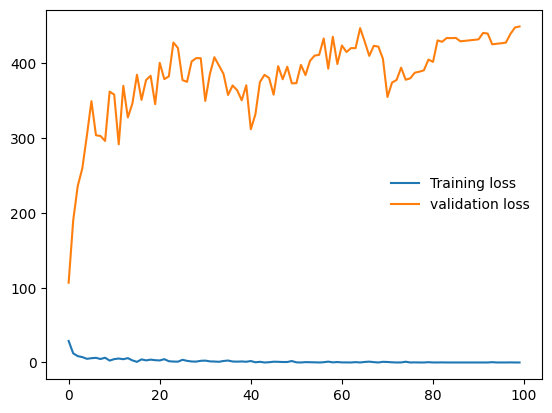

In [22]:
from matplotlib import pyplot as plt

plt.plot(train_loss_data, label="Training loss")
plt.plot(valid_loss_data, label="validation loss")
plt.legend(frameon=False)

In [29]:
import os
import pickle
A = '/content/sagorsarker/bangla-bert-base_lasttwopooler_contest_val.pth'
print(os.path.getsize(A))
if os.path.getsize(A):
  with open(A, 'wb') as M:
    Unpicker = pickle.load(M)

0


In [25]:
model.load_state_dict(torch.load(DirPath+bert_model_name+"_lasttwopooler_contest_val.pth", map_location = device))

EOFError: ignored

In [26]:
all_preds = []
all_labels = []

for batch in test_dataloader:
    text, labels = batch
    inputs = tokenizer.batch_encode_plus(
        text, **tokenizer_config
    )
    input_ids = inputs['input_ids'].to(device)
    token_type_ids = inputs['token_type_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    labels = labels.to(device)

    # move things to model
    output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)
    preds = output.detach().cpu().numpy()
    preds = np.argmax(preds, axis = 1)
    all_preds.extend(preds)
    all_labels.extend(labels.cpu().numpy())

In [27]:
from sklearn.metrics import classification_report

# preds = np.argmax(preds, axis = 1)
print(classification_report(all_labels, all_preds))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76       717
           1       0.59      0.75      0.66       417
           2       0.71      0.51      0.59       196

    accuracy                           0.71      1330
   macro avg       0.70      0.66      0.67      1330
weighted avg       0.72      0.71      0.71      1330



<h1>Training the model with All Collected dataset with the selected model and hyperparameters(Code not yet updated)<h1>

In [ ]:
!pip install --quiet transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 77.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.4 MB/s eta 0:00:00


In [ ]:
import time

import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.optim import AdamW
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from transformers import BertModel, BertTokenizer, BertForSequenceClassification

In [ ]:
#df loading
df_train = pd.read_csv('train.csv')[['sentence','hate speech']]
df_val = pd.read_csv('val.csv')[['sentence','hate speech']]
df_test = pd.read_csv('test.csv')[['sentence','hate speech']]

#concatenating all the data
df_train = pd.concat([df_train, df_val, df_test], ignore_index=True)

print(df_train.shape)
print(df_val.shape)
print(df_test.shape)
print(df_train)
print(df_train.describe())

(50281, 2)
(5028, 2)
(5029, 2)
                                                sentence  hate speech
0                             .... ঐ ইন্দুর তোই মরছ নাই?            1
1      #গেবনের শেষে আইসা আপনার মুখোশ টা খুলছে এতেই আম...            1
2            ✈✈✈✈��� মুরগি চোরের পাছায় ডুকবি আর মারবি।।।            1
3      ১৮ কোটির চোদা খাওয়া শেষে এখন ১৫০কোটির চোদা খাব...            1
4                          ২য় মীর জাফরের মুখে মুতে দে...            1
...                                                  ...          ...
50276  হেট লাইন কি দিছোফালতু হেট লাইন দেয়ার জন্যআইন অ...            0
50277  হ্যা অবশ্যই পারবে শাকিব খান যেমন সুন্দর স্মার্...            0
50278                  হ্যাঁ ক্ষমা করে দিয়েছি রানু দিকে            0
50279  হ্যাঁ পমিতের যাব যেন শাকিব খানের উপজেলা এক হয়...            0
50280  হ্যালো আসসালামু আলাইকুম আল্লাহ তুমি মুসলমানদের...            0

[50281 rows x 2 columns]
        hate speech
count  50281.000000
mean       0.480420
std        0.499621
min        0.000000
25%

In [ ]:
#defining previous hyperparameters got from testing
max_number_input_tokens=256
batch_size_training = 16
first_dropout_rate = 0.3
hidden_output = 768
bert_model_name = "sagorsarker/bangla-bert-base"
adam_opt_lr = 3e-5
scheduler_step = 1
scheduler_gamma = 0.8
epochs = 6
classes = 2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
DirPath = ('/content/drive/My Drive/Test/')

Mounted at /content/drive


In [ ]:
class NewsDatasets(Dataset):
    def __init__(self, data, max_length=max_number_input_tokens):
        self.data = data

        self.config = {
            "max_length": max_length,
            "padding": "max_length",
            "return_tensors": "pt",
            "truncation": True,
            "add_special_tokens": True,
            "truncation_strategy":"longest_first"
        }

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        value = self.data.iloc[idx]
        return value['sentence'] , value['hate speech']

In [ ]:
training_data = NewsDatasets(df_train)
train_dataloader = DataLoader(training_data, batch_size=batch_size_training, shuffle=True)

val_data = NewsDatasets(df_val)
val_dataloader = DataLoader(val_data, batch_size=batch_size_training, shuffle=True)

test_data = NewsDatasets(df_test)
test_dataloader = DataLoader(test_data, batch_size=batch_size_training, shuffle=True)

In [ ]:
class CustomBERTBengali(nn.Module):
    def __init__(self, bert):
        super(CustomBERTBengali, self).__init__()
        self.bert = bert
        self.bert_drop = nn.Dropout(first_dropout_rate)
        self.tanh = nn.Tanh()
        self.out = nn.Linear(hidden_output * 3, classes)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, input_ids, attention_mask, token_type_ids):
        outputs = self.bert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids
        )
        o1 = outputs.hidden_states[-1]
        o2 = outputs.pooler_output
        apool = torch.mean(o1, 1)
        mpool, _ = torch.max(o1, 1)
        pooled_output = o2
        cat = torch.cat((apool, mpool, pooled_output), 1)
        bo = self.bert_drop(cat)
        logits = self.out(bo)
        logits = self.softmax(logits)
        return logits

In [ ]:
bert = BertModel.from_pretrained(bert_model_name, output_hidden_states=True)
tokenizer = BertTokenizer.from_pretrained(bert_model_name)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomBERTBengali(bert)
model.to(device)

CustomBERTBengali(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(102025, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwis

In [ ]:
from torch.optim.lr_scheduler import StepLR

optimizer = AdamW(model.parameters(), lr=adam_opt_lr)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=scheduler_step, gamma=scheduler_gamma)

In [ ]:
def train(model, dataloader, optimizer, criterion, config):
    model.train()  # prep model for training
    train_loss = 0
    for batch in tqdm(dataloader):
        text, labels = batch

        model.zero_grad()

        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        #labels = labels.to(device)
        labels = labels.to(device, dtype=torch.long)  # Convert labels to torch.long

        # move things to model
        logs = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss = criterion(logs, labels)
        train_loss += loss.item() * input_ids.size(0)
        loss.backward()

        # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
        nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    return train_loss

In [ ]:
def evaluate(model, dataloader, criterion, config):
    total = 0
    correct = 0
    valid_loss = 0.0

    model.eval()  # prep model for evaluation
    for batch in dataloader:
        text, labels = batch
        inputs = tokenizer.batch_encode_plus(
            text, **config
        )
        input_ids = inputs['input_ids'].to(device)
        token_type_ids = inputs['token_type_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        labels = labels.to(device)

        # move things to model
        output = model(token_type_ids=token_type_ids, input_ids=input_ids, attention_mask=attention_mask)

        loss_p = criterion(output, labels)
        # update running validation loss
        valid_loss += loss_p.item() * input_ids.size(0)
        # calculate accuracy
        proba = torch.exp(output)
        top_p, top_class = proba.topk(1, dim=1)
        equals = top_class == labels.view(*top_class.shape)
        # accuracy += torch.mean(equals.type(torch.FloatTensor)).item()

        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    return total, correct, valid_loss

In [ ]:
tokenizer_config = {
    "max_length": max_number_input_tokens,
    "padding": "max_length",
    "return_tensors": "pt",
    "truncation": True,
    "add_special_tokens": True,
     "truncation_strategy":"longest_first"
}

In [ ]:
train_loss_data, valid_loss_data = [], []
valid_loss_min = np.Inf
since = time.time()
best_loss = np.inf

for epoch in range(epochs):
    print("Epoch: {}/{}".format(epoch + 1, epochs))
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    total = 0
    correct = 0
    e_since = time.time()

    # Train Model
    train_loss += train(model, train_dataloader, optimizer, criterion, tokenizer_config)
    # Now Evaluate
    out = evaluate(model, val_dataloader, criterion, tokenizer_config)
    total += out[0]
    correct += out[1]
    valid_loss += out[2]

    scheduler.step()

    # print training/validation statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_dataloader.dataset)
    valid_loss = valid_loss / len(val_dataloader.dataset)

    # calculate train loss and running loss
    train_loss_data.append(train_loss * 100)
    valid_loss_data.append(valid_loss * 100)

    if True:
        best_loss = valid_loss
        torch.save(model.state_dict(), DirPath+bert_model_name+"_CustomBertBengaliFullDataset6epoch885044valacc.pth")
        print(f'epoch: {epoch+1}')

    print("\tTrain loss:{:.6f}..".format(train_loss),
          "\tValid Loss:{:.6f}..".format(valid_loss),
          "\tVal Accuracy: {:.4f}".format(correct / total * 100))

time_elapsed = time.time() - since
print('Training completed in {:.0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))

Epoch: 1/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 1
	Train loss:0.449559.. 	Valid Loss:0.420331.. 	Val Accuracy: 89.2601
Epoch: 2/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 2
	Train loss:0.432832.. 	Valid Loss:0.430235.. 	Val Accuracy: 88.2458
Epoch: 3/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 3
	Train loss:0.438746.. 	Valid Loss:0.435792.. 	Val Accuracy: 87.7486
Epoch: 4/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 4
	Train loss:0.439238.. 	Valid Loss:0.435497.. 	Val Accuracy: 87.7685
Epoch: 5/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 5
	Train loss:0.448464.. 	Valid Loss:0.429014.. 	Val Accuracy: 88.4248
Epoch: 6/6


  0%|          | 0/3143 [00:00<?, ?it/s]

epoch: 6
	Train loss:0.444639.. 	Valid Loss:0.436770.. 	Val Accuracy: 87.6492
Training completed in 227m 4s
